In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import docx

__Это вторая чаасть сбора и предобработки данных, а также их последующий EDA__

__Первая лежит в файле 'pt_1_Предобработка.ipynb'__

In [60]:
# Для начала подгрузим уже собранный датасет
all_dataset = pd.read_csv('all_dataset.csv').iloc[:, 1:]
all_dataset

,Регион,Год,Число больничных коек,Мощность амбулаторно-поликлинических организаций,Численность врачей всех специальностей,Численность среднего медицинского персонала,Заболеваемость на 1000 человек населения,Среднедушевые денежные доходы населения,Смертность населения в трудоспособном возрасте,Число предприятий и организаций,Выбросы загрязняющих веществ в атмосферный воздух,Улавливание загрязняющих атмосферу веществ,Сброс загрязненных сточных вод в поверхностные водные объекты,Средняя продолжительность жизни
0,Белгородская область,2005,111.5,224.2,39.6,117.8,780.0,5276.0,618.6,21857.0,102.0,911.0,11.0,68.43
1,Белгородская область,2010,81.4,232.4,40.4,116.1,756.7,16993.0,502.9,21857.0,132.0,764.0,77.0,71.31
2,Белгородская область,2015,77.1,241.7,41.3,113.4,707.4,28043.0,465.9,21857.0,118.0,639.0,61.0,72.61
3,Белгородская область,2019,70.4,270.2,40.5,106.1,694.5,32398.0,415.8,21857.0,157.0,853.0,69.0,74.21
4,Белгородская область,2020,69.5,271.8,40.4,105.0,714.0,32884.0,499.7,21857.0,168.0,1075.0,66.0,72.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Чукотский автономный округ,2010,171.2,504.3,76.7,160.9,1213.5,38147.0,1328.4,1356.0,22.0,30.0,5.0,57.49
494,Чукотский автономный округ,2015,149.3,486.5,65.0,144.1,1076.3,63308.0,865.8,1143.0,21.0,30.0,4.1,64.16
495,Чукотский автономный округ,2019,126.9,476.5,71.0,140.8,1149.2,83385.0,801.3,1096.0,18.0,23.0,3.0,68.09
496,Чукотский автономный округ,2020,128.8,487.6,73.7,142.5,1182.2,89548.0,853.2,1113.0,17.0,21.0,2.9,65.82


### Сбор данных part 2
 
 На данном этапе уже имелся датасет, в который были собраны данные по интересующим нас областям для регионов РФ. Однако данные были получены только за 2005, 2010, 2015, 2019, 2020 и 2021 (тк только они были представлены в наиболее удобном для считывания формате).
 
 В целом, можно было остановиться и на этом, тк наша выборка out-of-time и мы будем учитывать тренд, с помощью добавления года как признака для будущей модели. Но мы решили еще раз изучить возможности расширения нашего датасета и выяснили, что на сайте Росстата все данные прошлых лет, в том числе и интересующее нас статистическое издание "Регионы России. Социально-экономические показатели" хранятся в двух форматах: либо rar с pdf/doc внутри, либо прямые ссылки на doc файлы. 
 
 Мы решили попробовать расширить датасет, воспользовавшись библиотекой docx, которая позволяет удобно вычленять информацию из вордовских файлов, однако столкнулись с большой с трудностью: нам хотелось считывать файлы напрямую по ссылке, а не с компьютера/из репозитория, но данная библиотека позволяет работать только с файлами формата docx, наши же файлы все в формате doc. 
 
 Далее мы начали изучать, как можно эту проблему обойти и вышли на asposewordscloud WordsApi - api который позволяет производить множество действий с файлами различного формата, в том числе конвертирование файлов из doc в docx. Мы пробовали реализовать автоматическую конвертацию файлов, однако, к сожалению, сделать этого не смогли. Вылезает неизвестная ошибка (даже написали вопрос на support forum  aspose). Если в будущем получится проблему устранить, то добавим автоматическую конвертацию файлов, но пока просто загрузили их все на компьютер и вручную пересохранили их в нужном формате. Файлы также лежат в репозитории в папке data

### Обзор переменных датасета: 

Тк переменные меняться уже не будут, мы просто добавим еще наблюдений с другими годами, то сразу опишем наш датасет и его переменные (это было сделано еще до принятия решениия о том, что мы будем расширять датасет).
Наш датасет содержит следующие колонки:
- Регион 
- Год 
- Число больничных коек
- Мощность амбулаторно-поликлинических организаций на 10000 человек населения
- Численность врачей всех специальностей на 10000 человек населения
- Численность среднего медицинского персонала на 10000 человек населения
- Заболеваемость на 1000 человек населения
- Среднедушевые денежные доходы населения
- Смертность населения в трудоспособном возрасте
- Число предприятий и организаций
- Выбросы загрязняющих веществ в атмосферный воздух
- Улавливание загрязняющих атмосферу веществ
- Сброс загрязненных сточных вод в поверхностные водные объекты
- Средняя продолжительность жизни     

Всепеременные кроме региона (str) и года (int) представленны как вещественные числа в формате float. Работа с n/a была проделана ранее (описана на этапах сбора данных)

Большая часть пременных представлена в относительном выражении (на душу населения): среднедушевые дходы, численнсть врачей и пр. 
В дальнейшем мы планируем выполнить нормировку/стандартизацию данных, чтобы они более подходили под построение ML модели

In [3]:
all_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Регион                                                         498 non-null    object 
 1   Год                                                            498 non-null    int64  
 2   Число больничных коек                                          498 non-null    float64
 3   Мощность амбулаторно-поликлинических организаций               498 non-null    float64
 4   Численность врачей всех специальностей                         498 non-null    float64
 5   Численность среднего медицинского персонала                    498 non-null    float64
 6   Заболеваемость на 1000 человек населения                       498 non-null    float64
 7   Среднедушевые денежные доходы населения                       

In [4]:
all_dataset.columns

Index(['Регион', 'Год', 'Число больничных коек',
       'Мощность амбулаторно-поликлинических организаций',
       'Численность врачей всех специальностей',
       'Численность среднего медицинского персонала',
       'Заболеваемость на 1000 человек населения',
       'Среднедушевые денежные доходы населения',
       'Смертность населения в трудоспособном возрасте',
       'Число предприятий и организаций',
       'Выбросы загрязняющих веществ в атмосферный воздух',
       'Улавливание загрязняющих атмосферу веществ',
       'Сброс загрязненных сточных вод в поверхностные водные объекты',
       'Средняя продолжительность жизни'],
      dtype='object')

### Расширение датасета:

Для начала мы мы создали словарь с названиями признаков и названиями файлов, которые им соответствуют, чтобы потом запустиить преобразование файлов в дф циклом

Затем методом проб и ошибок создали функцию docx_transform, которая приниимает на вход название признака и название файла, а возвращает преобразованную к длинному фрмату таблицу из входного файла

In [5]:
features_links_basic = {
    'Заболеваемость на 1000 человек населения': '06-08.docx',
    'Среднедушевые денежные доходы населения': '04-04.docx',
    'Смертность населения в трудоспособном возрасте': '02-10.docx',
    'Число предприятий и организаций': '13-01.docx',
    'Выбросы загрязняющих веществ в атмосферный воздух': '09-03.docx',
    'Улавливание загрязняющих атмосферу веществ': '09-05.docx',
    'Сброс загрязненных сточных вод в поверхностные водные объекты': '09-09.docx' ,
    'Средняя продолжительность жизни' : '02-15.docx'
}
features_links_double = {
    'Число больничных коек': '06-01.docx',
    'Мощность амбулаторно-поликлинических организаций': '06-03.docx',
    'Численность врачей всех специальностей': '06-04.docx',
    'Численность среднего медицинского персонала': '06-06.docx',
}

In [6]:
# сразу оставили ссылки на случай, если получится все-таки осуществить конвертацию файлов через api
'''
features_links_basic = {
    'Заболеваемость на 1000 человек населения': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/06-08.doc',
    'Среднедушевые денежные доходы населения': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/04-04.doc',
    'Смертность населения в трудоспособном возрасте': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/02-10.doc',
    'Число предприятий и организаций': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/13-01.doc',
    'Выбросы загрязняющих веществ в атмосферный воздух': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/09-03.doc'',
    'Улавливание загрязняющих атмосферу веществ': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/09-05.doc',
    'Сброс загрязненных сточных вод в поверхностные водные объекты': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/09-09.doc' ,
    'Средняя продолжительность жизни' : 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/02-15.doc'
    
}

features_links_double = {
    'Число больничных коек': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/06-01.doc',
    'Мощность амбулаторно-поликлинических организаций': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/06-03.doc',
    'Численность врачей всех специальностей': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/06-04.doc',
    'Численность среднего медицинского персонала': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/06-06.doc',
}
'''

"\nfeatures_links_basic = {\n    'Заболеваемость на 1000 человек населения': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/06-08.doc',\n    'Среднедушевые денежные доходы населения': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/04-04.doc',\n    'Смертность населения в трудоспособном возрасте': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/02-10.doc',\n    'Число предприятий и организаций': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/13-01.doc',\n    'Выбросы загрязняющих веществ в атмосферный воздух': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/09-03.doc'',\n    'Улавливание загрязняющих атмосферу веществ': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/09-05.doc',\n    'Сброс загрязненных сточных вод в поверхностные водные объекты': 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/09-09.doc' ,\n    'Средняя продолжительность жизни' : 'https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d01/02-15.doc'\n    \n}\n\nfeatures_links_double = {\n    'Чис

In [7]:
def docx_transform (feature, file_name):
    # Открываем документ Word
    doc = docx.Document(file_name)
    tables = doc.tables[:2]
    data = []
    prev = 'n\a'
    for table in tables:
        # Перебираем все строки таблицы
        for i, row in enumerate(table.rows):
            # Создаем список для хранения данных текущей строки
            row_data = []
            # Перебираем все ячейки в текущей строке
            for j, cell in enumerate(row.cells):
                # Получаем значение ячейки в текущей строке и столбце
                cell_value = cell.text.replace('p', 'р')
                cell_value = cell_value.replace(',', '.')
                # Добавляем значение ячейки в список данных текущей строки
                row_data.append(cell_value.replace('\n', ''))

            # Добавляем список данных текущей строки в список данных всей таблицы
            data.append(row_data)
            
    # шаманим (убираем сводные данные, приводим годы к индексам, убираем лишние строчки)
    
    data = pd.DataFrame(data)
    
    # сохраняем первую строчку в перемнную header 
    header = data.iloc[0, 0:]
    header[0] = 'Регион'

    # оставляем только строчки, где в первом столбце информация регионах (специальное условие)
    data = data[data[0].str.contains('область|г\\.|автономный|Республика|край')]
    data = data.rename(columns = header).drop(data.index[0])
    
    # преобразуем к длинному формату
    data = data.melt(id_vars=['Регион'], var_name='Год', value_name = feature)
    
    # Преобразуем колонку 'год' в числовой тип данных
    data['Год'] = pd.to_numeric(data['Год'], errors='coerce')
    # Удаляем все строки, где колонка 'год' не является числом
    data = data.dropna(subset=['Год'])
    data['Год'] = data['Год'].astype(int)
    
    # удаляем все наблюдения, кторые у нас уже собраны
    data = data.drop(data[data['Год'].isin([2005, 2010, 2015, 2019, 2020, 2021])].index)  
    
    # преобразуем переменные в тип float
    data[feature] = pd.to_numeric(data[feature], errors='coerce')
    data[feature] = data[feature].astype(float)
    
    return data

Далее пробуем эту функцию, чтобы проверить все ли ок работает, что мы получаем по рзультатам работы функции

In [8]:
docx_transform('Число больничных коек','06-01.docx')

,Регион,Год,Число больничных коек
172,Брянская область,2011,91.4
173,Владимирская область,2011,83.9
174,Воронежская область,2011,94.0
175,Ивановская область,2011,101.4
176,Калужская область,2011,102.6
...,...,...,...
769,Амурская область,2017,95.5
770,Магаданская область,2017,121.7
771,Сахалинская область,2017,117.6
772,Еврейская автономная область,2017,121.6


Далее создаем full_dataset, куда джойним все преобразованные таблицы (по очереди)

In [18]:
# изначально оставим в full_dataset только регионы и годы (обрезаем feature с помощью iloc), чтобы далее везде был left_join

full_dataset = docx_transform('Заболеваемость на 1000 человек населения', '06-08.docx').iloc[:, :-1]

# сначала делали два списка, тк некоторые переменные были в не чень удобной таблице, но затем подгрузили другие таблицы,
# поэтому теперь списки не особо отличаются (но если все таки сработает WordsApi, то как раз будут нужны два списка)
for link, feature in features_links_basic.items():
    df_to_merge = docx_transform(link, feature)
    full_dataset = pd.merge(full_dataset, df_to_merge, how = 'left', on = ['Регион', 'Год'])
for link, feature in features_links_double.items():
    df_to_merge = docx_transform(link, feature)
    full_dataset = pd.merge(full_dataset, df_to_merge, how = 'left', on = ['Регион', 'Год'])

full_dataset = full_dataset.fillna(full_dataset.median())
full_dataset

/var/folders/31/z568w7_14jncn2cbvf2_6mxc0000gn/T/ipykernel_24070/441758867.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_dataset = full_dataset.fillna(full_dataset.median())


,Регион,Год,Заболеваемость на 1000 человек населения,Среднедушевые денежные доходы населения,Смертность населения в трудоспособном возрасте,Число предприятий и организаций,Выбросы загрязняющих веществ в атмосферный воздух,Улавливание загрязняющих атмосферу веществ,Сброс загрязненных сточных вод в поверхностные водные объекты,Средняя продолжительность жизни,Число больничных коек,Мощность амбулаторно-поликлинических организаций,Численность врачей всех специальностей,Численность среднего медицинского персонала
0,Брянская область,2011,855.9,15348.0,687.0,21807.0,37.0,477.0,75.0,68.83,91.4,251.1,36.1,111.0
1,Владимирская область,2011,931.4,14312.0,754.6,35422.0,35.0,14.0,126.0,68.08,83.9,324.4,34.8,111.0
2,Воронежская область,2011,553.3,15909.0,592.2,54221.0,72.0,52.0,135.0,70.41,94.0,253.6,54.0,111.0
3,Ивановская область,2011,941.7,13006.0,704.0,30890.0,37.0,24.0,99.0,68.56,101.4,214.7,54.5,111.0
4,Калужская область,2011,716.0,17557.0,665.7,26761.0,13.0,135.0,88.0,69.49,102.6,262.2,39.9,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,Амурская область,2017,848.8,30663.0,630.9,15723.0,133.0,331.0,67.0,69.06,95.5,289.3,55.7,117.5
512,Магаданская область,2017,679.4,53633.0,678.2,5353.0,33.0,49.0,15.0,69.37,121.7,431.4,61.8,165.2
513,Сахалинская область,2017,786.0,48727.0,601.7,17278.0,105.0,50.0,33.0,70.19,117.6,251.1,58.4,135.6
514,Еврейская автономная область,2017,687.7,23386.0,595.5,3540.0,23.0,106.0,14.0,68.83,121.6,274.1,47.8,121.8


Теперь с помощью метода concat добавляем дф, полученный на данном этапе к дф, который был получен ранее и получаем полный датасет, который и будем использовать далее

Еще раз о структуре датасета:
В первом столбце регионы (они повтряются), во втором столбце годы (2005, 2010-2017, 2019-2021), в остальных столбцах значения переменных, которые мы ранее уже описали. Таким образом у нас уникальны пары Регион-Год, каждая такая пара и соответствует одной строке или одному наблюдению

n/a было решено заплнить медианами, тк большая часть данных представдена в относительном выражении, а медианы позволят не потерять данные, но мы знаем, что регионы, которые вошли в состав РФ в 2014 году, будут за все остальные годы иметь в таком случае строки состоящие только из медиан, поэтому удалим их


In [24]:
final_dataset = pd.DataFrame()
final_dataset = pd.concat([all_dataset, full_dataset]).fillna(final_dataset.median())
final_dataset = final_dataset.sort_values(['Регион', 'Год']).fillna(final_dataset.median())
final_dataset = final_dataset.loc[~((final_dataset['Регион'].isin(['г. Севастополь', 'Республика Крым'])) & (final_dataset['Год'] < 2014))]
final_dataset

/var/folders/31/z568w7_14jncn2cbvf2_6mxc0000gn/T/ipykernel_24070/2262998160.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_dataset = final_dataset.sort_values(['Регион', 'Год']).fillna(final_dataset.median())


,Регион,Год,Число больничных коек,Мощность амбулаторно-поликлинических организаций,Численность врачей всех специальностей,Численность среднего медицинского персонала,Заболеваемость на 1000 человек населения,Среднедушевые денежные доходы населения,Смертность населения в трудоспособном возрасте,Число предприятий и организаций,Выбросы загрязняющих веществ в атмосферный воздух,Улавливание загрязняющих атмосферу веществ,Сброс загрязненных сточных вод в поверхностные водные объекты,Средняя продолжительность жизни
390,Алтайский край,2005,117.7,281.1,46.7,109.9,987.2,4640.0,853.7,21857.0,233.0,787.0,34.0,64.62
391,Алтайский край,2010,112.1,347.8,48.7,109.2,1035.7,11029.0,668.0,21857.0,207.0,776.0,15.0,68.36
69,Алтайский край,2011,108.1,285.5,50.4,111.0,1052.4,12500.0,646.4,59132.0,204.0,712.0,12.0,68.97
155,Алтайский край,2012,105.0,292.6,46.0,111.0,1087.5,13617.0,637.2,59132.0,216.0,822.0,8.0,69.11
241,Алтайский край,2013,103.6,294.3,45.7,114.5,1090.3,15979.0,623.1,56770.0,201.0,558.0,8.0,69.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,г. Санкт-Петербург,2020,82.8,354.6,89.3,110.9,990.2,49375.0,440.4,21857.0,67.0,38.0,971.0,73.99
173,г. Санкт-Петербург,2021,84.7,374.2,91.6,110.3,1200.6,57745.0,494.8,21857.0,72.0,33.0,998.0,72.51
294,г. Севастополь,2014,70.5,208.3,41.1,82.4,561.8,22011.5,498.9,5690.0,1.0,0.5,19.0,72.28
380,г. Севастополь,2016,60.2,191.6,40.2,78.3,515.8,24096.0,551.6,10549.0,4.0,2.0,22.0,71.64


In [11]:
final_dataset.to_csv('final_dataset.csv')

### EDA и визуализации

Для начала убедимся, что во время расширения датасета мы ничего не потеряли, все осталось в нужных форматах, все n/a обработали

In [25]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 390 to 466
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Регион                                                         1008 non-null   object 
 1   Год                                                            1008 non-null   int64  
 2   Число больничных коек                                          1008 non-null   float64
 3   Мощность амбулаторно-поликлинических организаций               1008 non-null   float64
 4   Численность врачей всех специальностей                         1008 non-null   float64
 5   Численность среднего медицинского персонала                    1008 non-null   float64
 6   Заболеваемость на 1000 человек населения                       1008 non-null   float64
 7   Среднедушевые денежные доходы населения                    

In [26]:
final_dataset.iloc[:, 2:].describe()

,Число больничных коек,Мощность амбулаторно-поликлинических организаций,Численность врачей всех специальностей,Численность среднего медицинского персонала,Заболеваемость на 1000 человек населения,Среднедушевые денежные доходы населения,Смертность населения в трудоспособном возрасте,Число предприятий и организаций,Выбросы загрязняющих веществ в атмосферный воздух,Улавливание загрязняющих атмосферу веществ,Сброс загрязненных сточных вод в поверхностные водные объекты,Средняя продолжительность жизни
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03,1008.000000,1008.000000,1008.000000,1008.000000
mean,92.837440,274.526952,47.770230,111.485195,808.379695,25118.474321,623.959252,4.420544e+04,222.300973,525.974545,170.542955,69.798958
std,19.018164,56.106521,9.760405,15.190532,172.393145,13290.252032,168.793945,1.176852e+05,426.770791,1075.344856,254.605112,3.168863
min,44.100000,113.000000,26.300000,63.600000,309.000000,2392.000000,142.000000,9.360000e+02,0.100000,0.000000,0.000000,55.840000
25%,80.500000,244.300000,41.000000,104.500000,697.225000,17808.500000,546.875000,1.742075e+04,33.000000,26.000000,39.000000,68.420000
50%,90.100000,269.400000,47.700000,111.000000,795.850000,23264.000000,625.950000,2.185700e+04,89.000000,126.500000,84.000000,69.925000
75%,101.650000,298.650000,53.100000,116.300000,897.275000,28560.250000,690.575000,3.332700e+04,210.907792,549.672889,169.000000,71.530000
max,241.800000,588.900000,91.600000,167.100000,1813.800000,99905.000000,1328.400000,1.281657e+06,3520.000000,9600.000000,3578.000000,83.400000


In [29]:
corr_matrix = final_dataset.iloc[:, 2:].corr()  - np.eye(12)
corr_matrix 

,Число больничных коек,Мощность амбулаторно-поликлинических организаций,Численность врачей всех специальностей,Численность среднего медицинского персонала,Заболеваемость на 1000 человек населения,Среднедушевые денежные доходы населения,Смертность населения в трудоспособном возрасте,Число предприятий и организаций,Выбросы загрязняющих веществ в атмосферный воздух,Улавливание загрязняющих атмосферу веществ,Сброс загрязненных сточных вод в поверхностные водные объекты,Средняя продолжительность жизни
Число больничных коек,0.000000,0.341619,0.336047,0.465419,0.178657,-0.130883,0.689982,-0.121727,-0.064398,0.003666,-0.153482,-0.751107
Мощность амбулаторно-поликлинических организаций,0.341619,0.000000,0.370006,0.412301,0.344257,0.299682,0.367507,0.053766,0.063928,0.087589,-0.020402,-0.309091
Численность врачей всех специальностей,0.336047,0.370006,0.000000,0.311596,0.159606,0.329997,0.076020,0.222659,0.067160,0.010134,0.178303,-0.069870
Численность среднего медицинского персонала,0.465419,0.412301,0.311596,0.000000,0.277352,0.185639,0.309949,-0.189568,0.162228,-0.028443,-0.245041,-0.336087
Заболеваемость на 1000 человек населения,0.178657,0.344257,0.159606,0.277352,0.000000,0.353832,0.253960,-0.084209,0.157598,0.060629,0.005049,-0.205035
Среднедушевые денежные доходы населения,-0.130883,0.299682,0.329997,0.185639,0.353832,0.000000,-0.197461,0.230549,0.090489,-0.037168,0.116495,0.252450
Смертность населения в трудоспособном возрасте,0.689982,0.367507,0.076020,0.309949,0.253960,-0.197461,0.000000,-0.202313,0.058278,0.126381,-0.100673,-0.910949
Число предприятий и организаций,-0.121727,0.053766,0.222659,-0.189568,-0.084209,0.230549,-0.202313,0.000000,0.025916,0.033080,0.520745,0.246447
Выбросы загрязняющих веществ в атмосферный воздух,-0.064398,0.063928,0.067160,0.162228,0.157598,0.090489,0.058278,0.025916,0.000000,0.612249,0.210348,-0.049657
Улавливание загрязняющих атмосферу веществ,0.003666,0.087589,0.010134,-0.028443,0.060629,-0.037168,0.126381,0.033080,0.612249,0.000000,0.350025,-0.120786


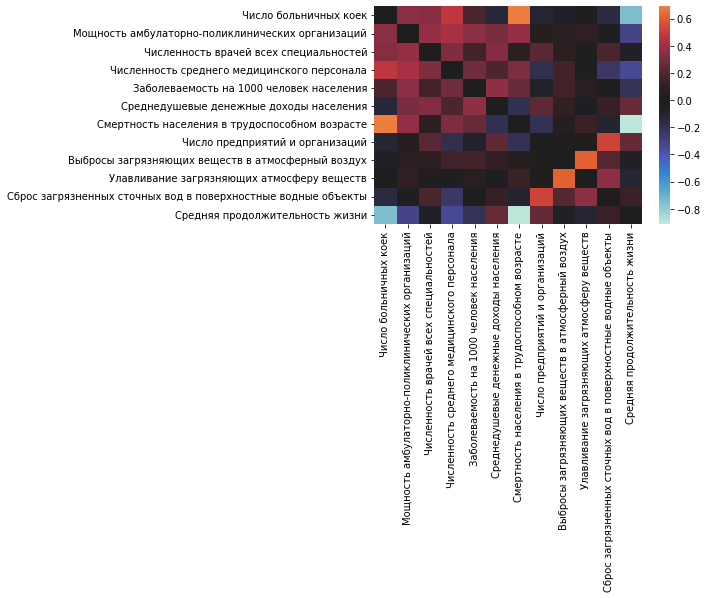

In [30]:
_=sns.heatmap(corr_matrix, center = 0)

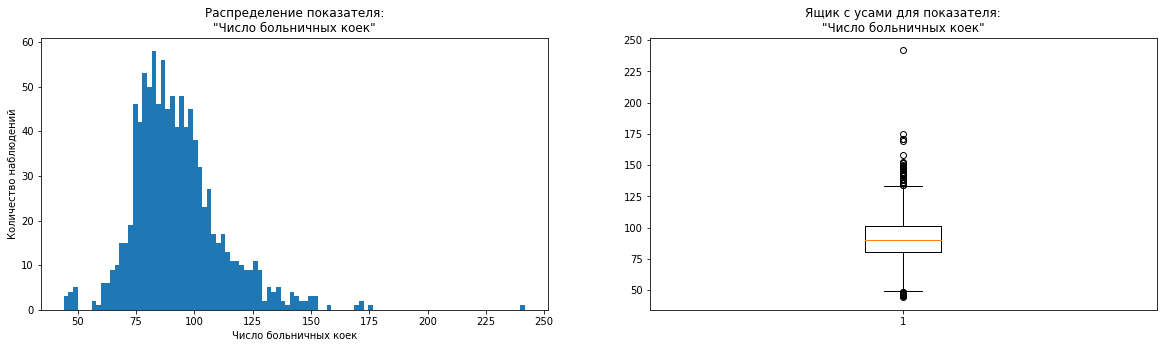

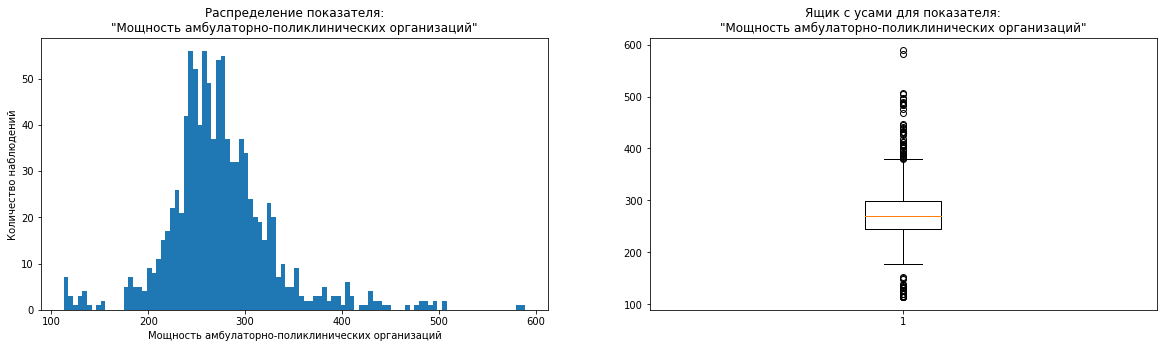

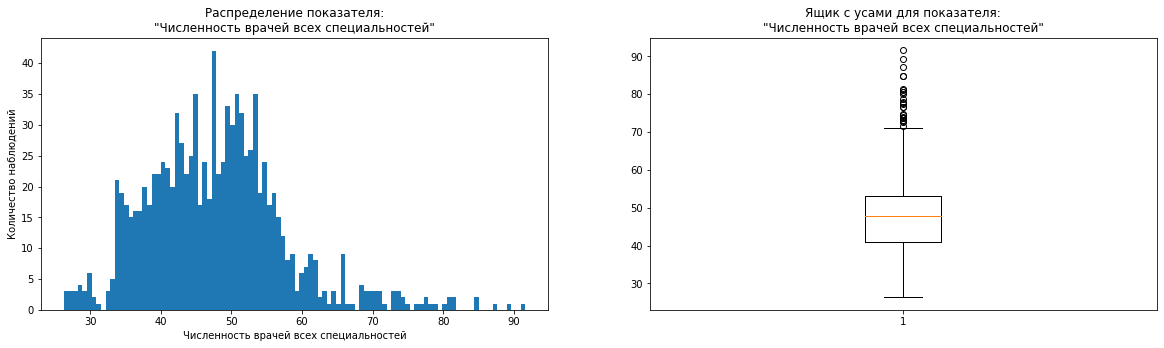

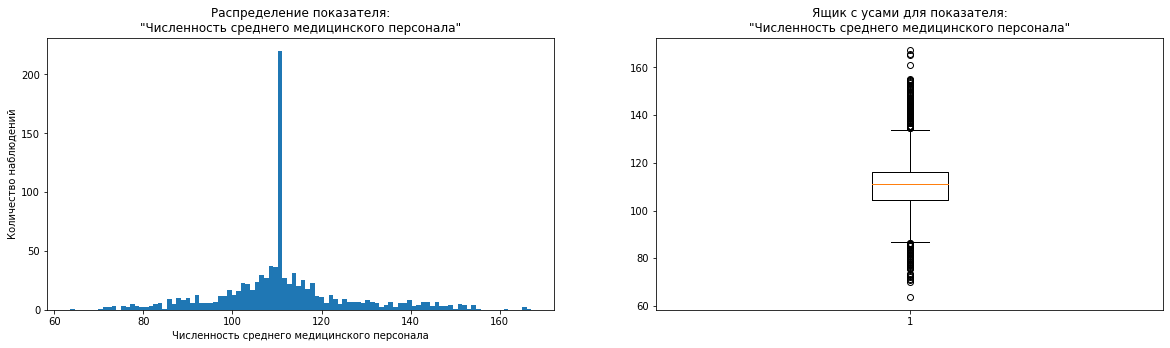

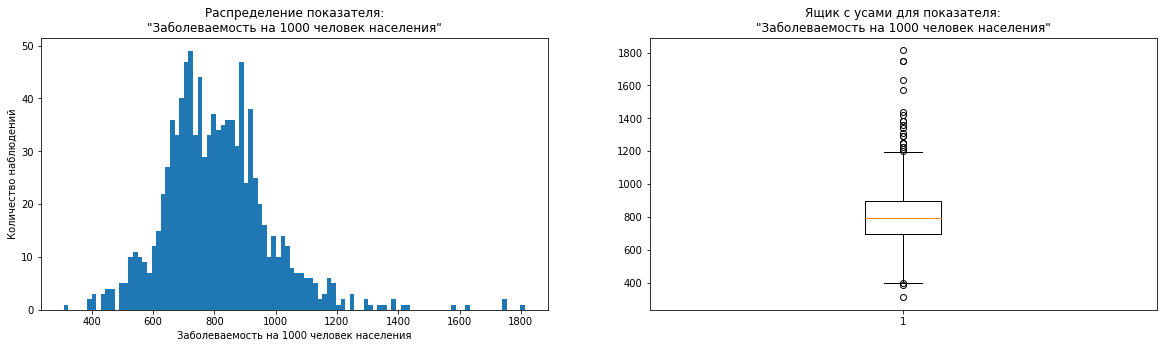

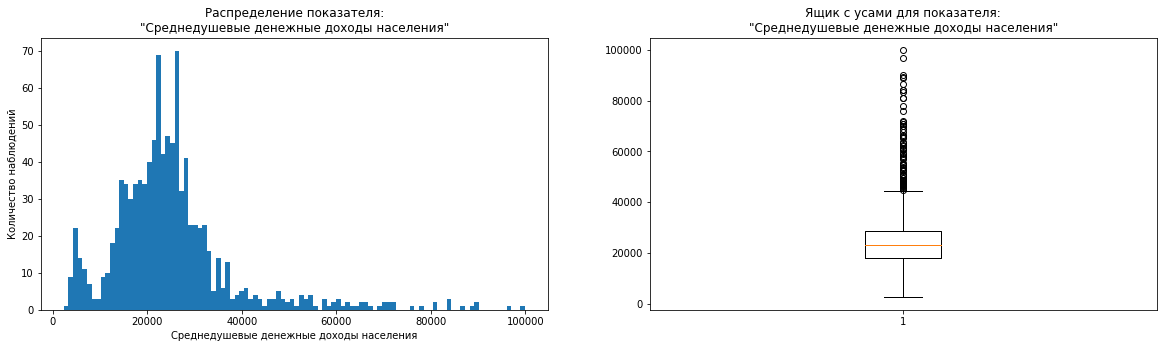

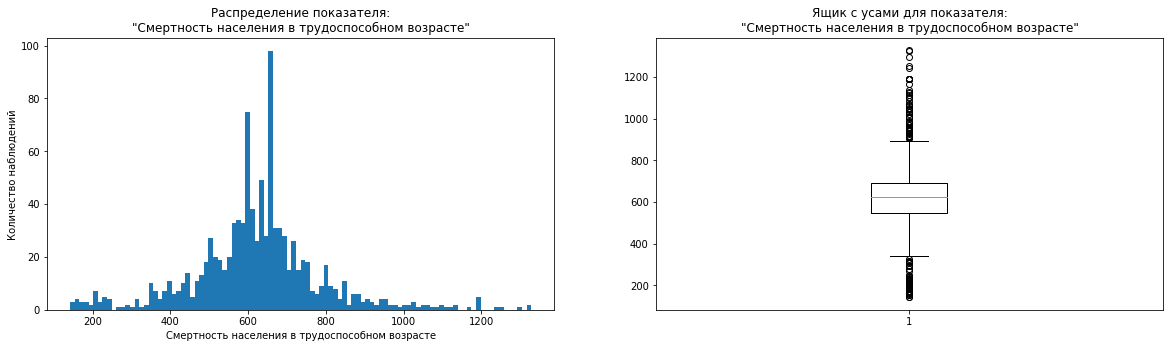

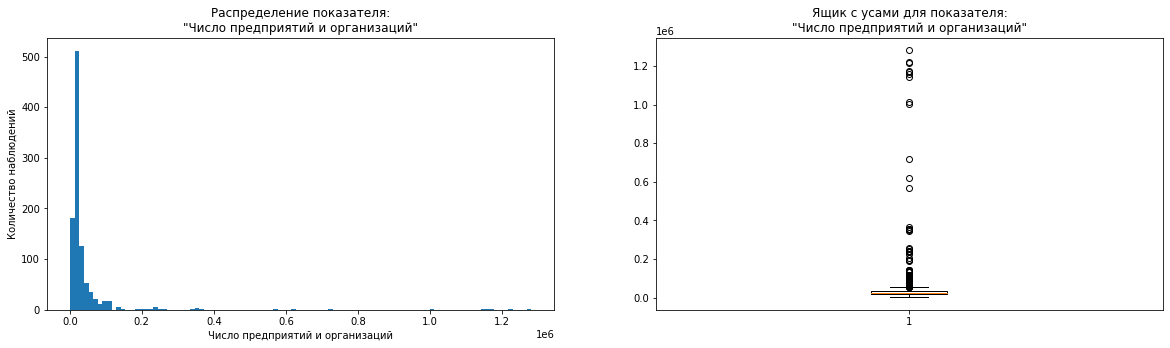

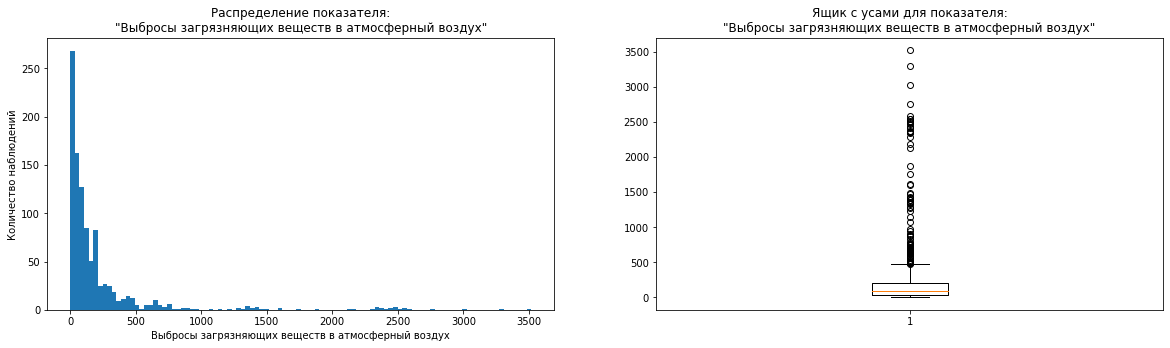

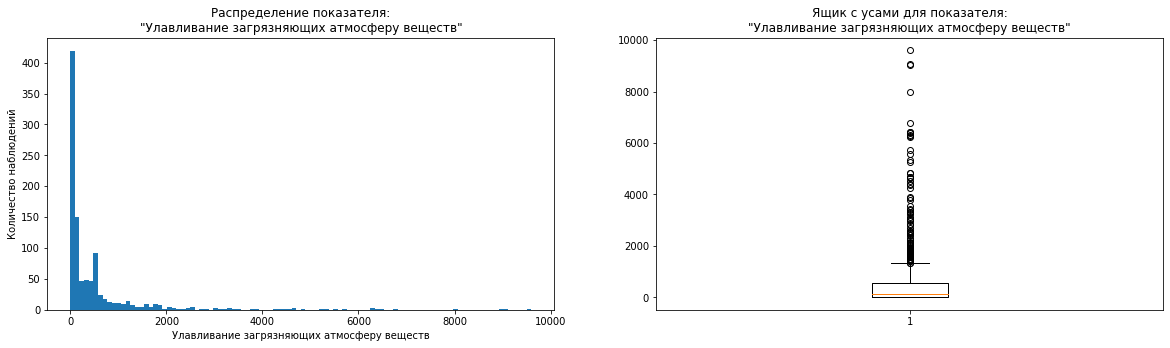

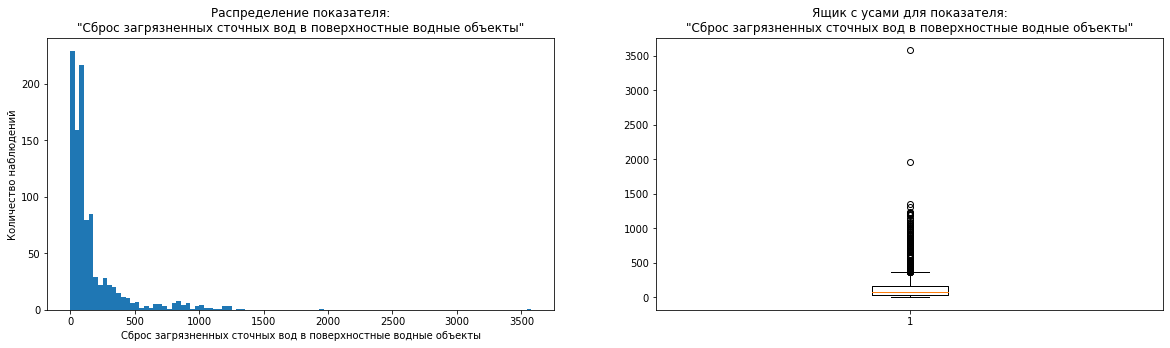

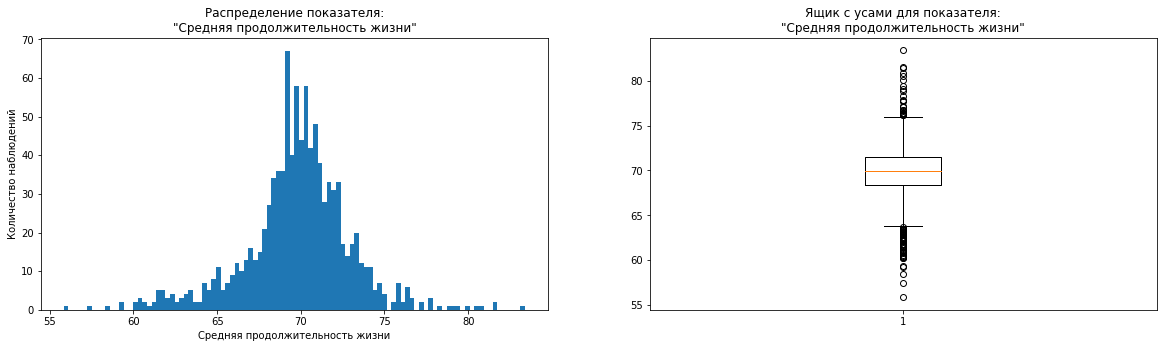

In [61]:
for feature in final_dataset.columns[2:]:
    fig, axs = plt.subplots(1, 2, figsize = (20, 5))
    axs[0].hist(final_dataset[feature], bins = 100)
    axs[0].set_title(f'Распределение показателя:\n"{feature}"')
    axs[0].set_xlabel(feature)
    axs[0].set_ylabel('Количество наблюдений')
     
    axs[1].boxplot(final_dataset[feature])
    axs[1].set_title(f'Ящик с усами для показателя:\n"{feature}"')

Итак, мы видим достаточно интересную картину: 
- часть распределений (например, продолжительность жизни, смертность, доходы и еще несколько) визуально напоминают нормальное распределение, которое в разной степени смещено относительно стандартного нормального, однако везде мы видим четко выраженную вершину и явные хвосты
- распределения всех экологических показателей и данные о количестве организаций и предприятий имеют визуально очень похожие распределения (везде очень много наблюдений сосредоточено около начала координат), то есть большинство наблюдений соответствуют маленьким значениям, однако много больших выбросов, поэтому длинные хвосты справа. Визуально распределение похоже на хи-квадрат
- график распределения численности врачей всех специальностей визуально отличается от остальных, тк там хоть и есть вершина, однако большое количество наблюдений лежит недалеко справа и слева от нее 

Что касаемо ящиков с усами, то тут ситуация схожа:
- большинство показателей имеют достаточно похожие графики: везде много выбросов, однако они в большинстве своем лежат близко к верхней и нижней границам ящика
- для экологических показателей ящик лежит сильно внизу, то есть, как мы и сказали ранее, большая часть значений находится около нуля, также видим очень много выбросов и они все выше ящика (тк не мб например выбросы вредных веществ в атмосферу <0)
- помимо этого отметим, что во всех ящиках помимо достаточно большого количества основных выбросов (которые относительно близки к "усам") есть также несколько сильно отдаленных выбросов

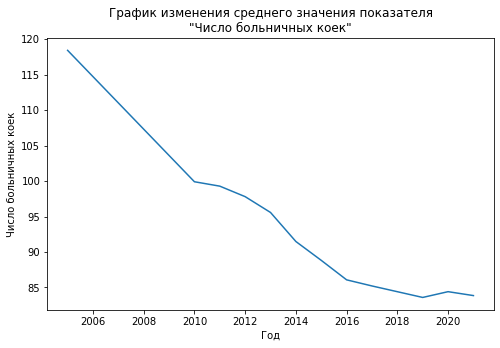

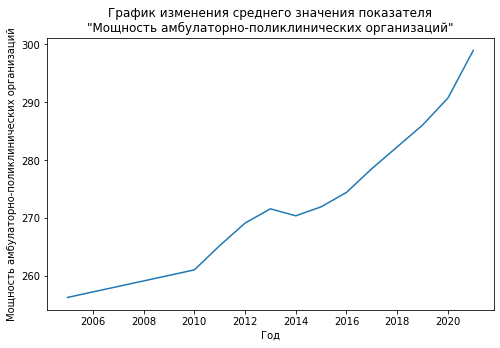

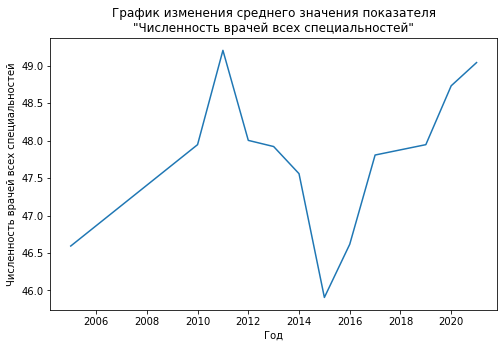

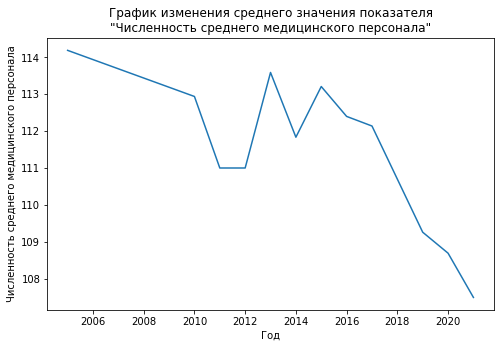

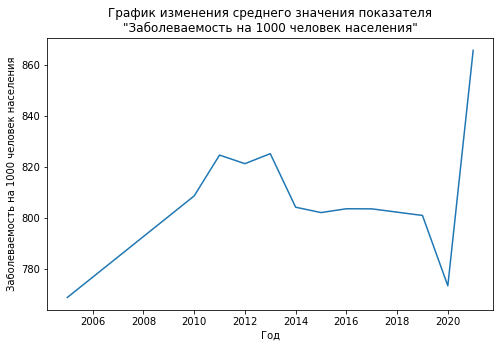

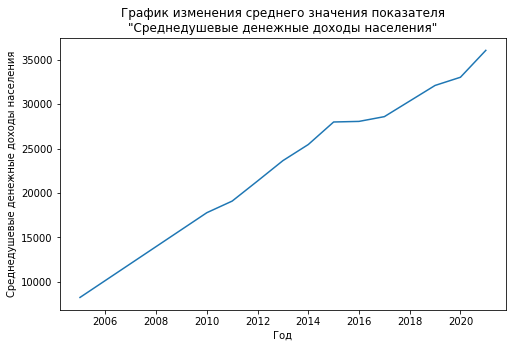

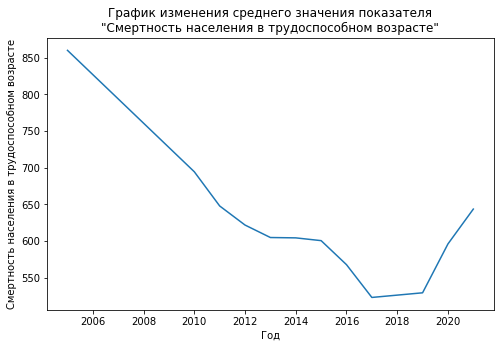

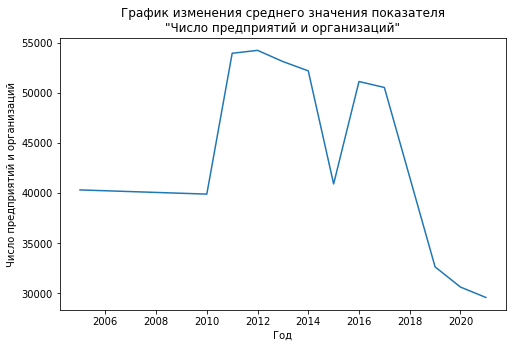

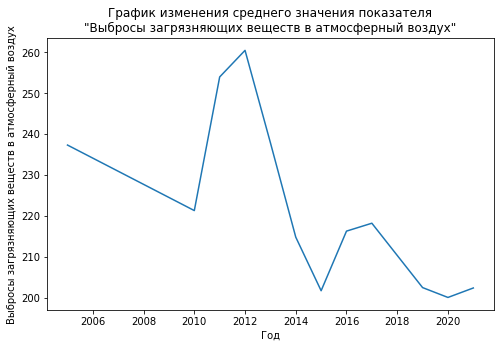

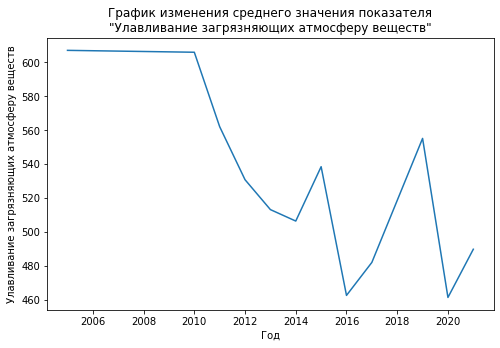

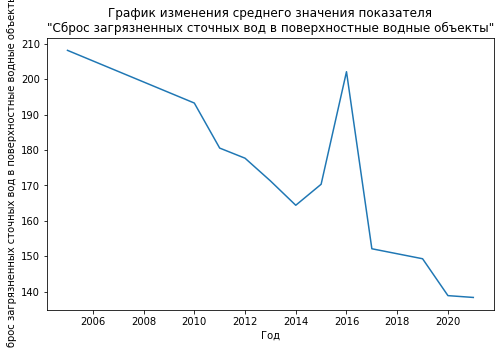

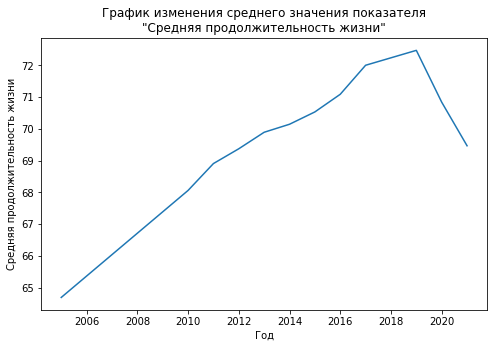

In [59]:
for feature in final_dataset.columns[2:]:
    fig, ax = plt.subplots(figsize = (8, 5))
    df = final_dataset[['Год', feature]].groupby('Год').mean()
    ax.plot(df.index, df[feature])
    ax.set_title(f'График изменения среднего значения показателя\n"{feature}"')
    ax.set_xlabel('Год')
    ax.set_ylabel(feature)

Построили графики, чтобы выяснить, существует ли в данных тренд. Хоть мы и берем год как отдельный x в нашей модели, нам будет полезно понять, как вообще данные меняются с течением времени

На графиках мы видим, что примерно у половины показателей есть очень очевидный тренд на рост/падение, который почти представляет собой прямую линию. У остальных показателей тренд найти можно, однако в середине есть много изломов, причем даже не в тех периодах, где у нас пробелы в данных. Это свидетельствует об отсутствии четкой закономерности, это значит, что мы модем утверждать, что в долгосрочном периоде данные показатели скорее растут/падают, но в краткосрочном периоде показатель может меняться иначе (в противофазе с трендом)

#### Наметки гипотез

- Проверить стационарность для каждого региона (Тест Дики — Фуллера)
- Проверим равенство распределений медицинских показателей (которые на графиках были похожи)
- Можно с помощью МНК проверить значимость признаков, которые имеют большую по модулю корреляцию с

### Попытки использования WordsApi

In [12]:
'''
import asposewordscloud
asposewordscloud.WordsApi()
'''

'\nimport asposewordscloud\nasposewordscloud.WordsApi()\n'

In [15]:
client_id = 'xxx'
client_secret = 'xxx'


In [16]:
import os
import asposewordscloud
import asposewordscloud.models.requests
from asposewordscloud.apis.words_api import WordsApi
from asposewordscloud.rest import ApiException
from asposewordscloud import models
from shutil import copyfile

words_api = WordsApi(client_id, client_secret)
words_api.api_client.configuration.host = 'https://api.aspose.cloud'

filename = '02-13.doc'
dest_name = 'output.docx'

convert_request = models.requests.ConvertDocumentRequest(document=open(filename, 'rb'), format='docx')
words_api.convert_document(convert_request)

#copyfile(result, dest_name)

KeyError: 'RequestId'

In [ ]:
'''